### Ping, Jitter and Basic Functions

In [ ]:
pip install speedtest-cli ping3

In [ ]:
import speedtest
import statistics

In [ ]:
st = speedtest.Speedtest()

download_speed_bps = st.download()
download_speed_mbps = (download_speed_bps / 1e6)/100
print(f"Download Speed: {download_speed_mbps:.2f} Mbps")

upload_speed_bps = st.upload()
upload_speed_mbps = (upload_speed_bps / 1e6)/100
print(f"Upload Speed: {upload_speed_mbps:.2f} Mbps")

servernames = []
st.get_servers(servernames)
ping = st.results.ping
print(f"Ping: {ping:.2f} ms")

Download Speed: 21.55 Mbps
Upload Speed: 6.70 Mbps
Ping: 23.46 ms


In [ ]:
ping_results = []
num_samples = 10

for _ in range(num_samples):
    st.get_best_server()
    ping_results.append(st.results.ping)

jitter = statistics.stdev(ping_results)
print(f"Jitter: {jitter:.2f} ms")

Jitter: 0.16 ms


### Plot Peak Hours

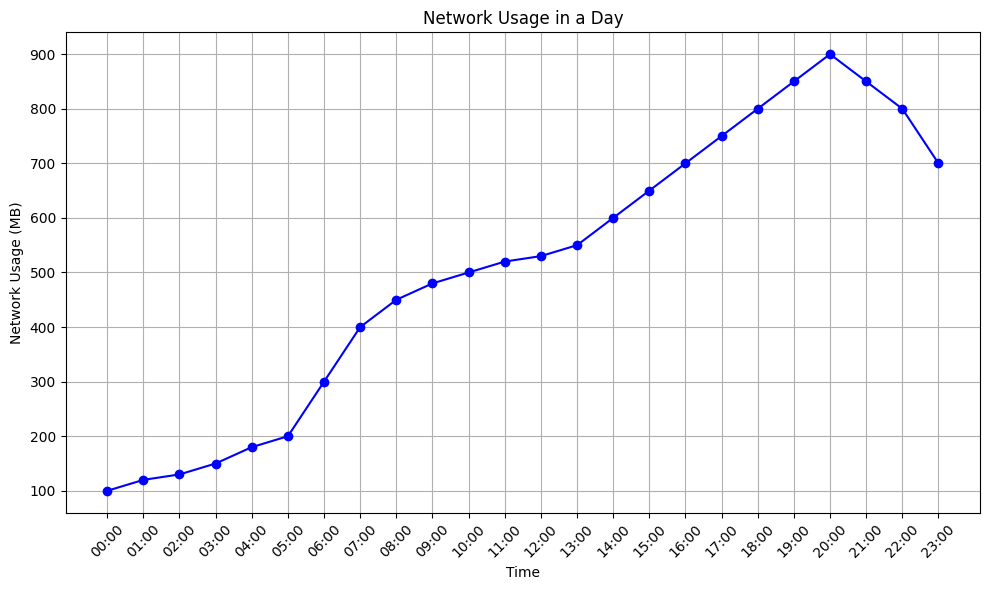

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Time': ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
    'Network Usage': [100, 120, 130, 150, 180, 200, 300, 400, 450, 480, 500, 520, 530, 550, 600, 650, 700, 750, 800, 850, 900, 850, 800, 700]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Network Usage'], marker='o', color='b')
plt.title('Network Usage in a Day')
plt.xlabel('Time')
plt.ylabel('Network Usage (MB)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
